# Step 1: Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 2: Load the dataset

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


# Step 3: Visualize the data to understand the distribution

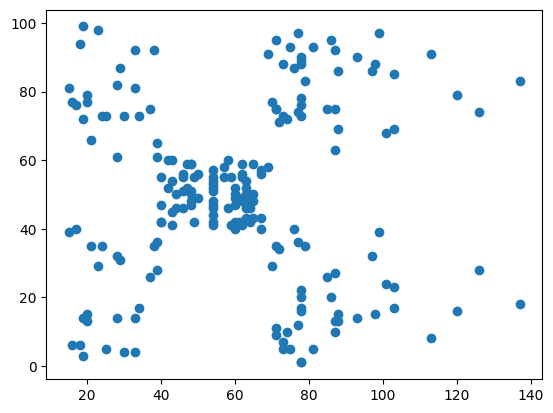

In [5]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])

# Step 4: Elbow method to determine the optimal number of clusters (k)

In [8]:
# inertia values (within-cluster sum of squares)
wcss = []
k_range = range(1,11)
for i in k_range:
    kmean = KMeans(n_clusters = i)
    kmean.fit(df)
    wcss.append(kmean.inertia_)

# Step 5: Plot the elbow plot to visualize inertia values for different k

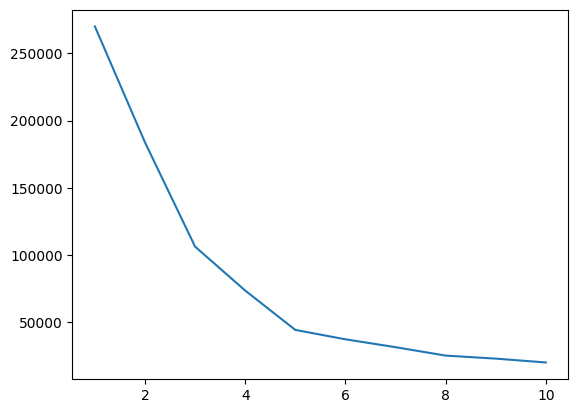

In [9]:
plt.plot(k_range,wcss)

# Step 6: Apply KMeans with the chosen number of clusters

In [11]:
kmean = KMeans(n_clusters = 5)
kmean.fit(df)

KMeans(n_clusters=5)

# Step 7: Add the cluster labels to the dataframe

In [15]:
df["clusters"] = kmean.labels_


# Step 8: Plot the clusters 

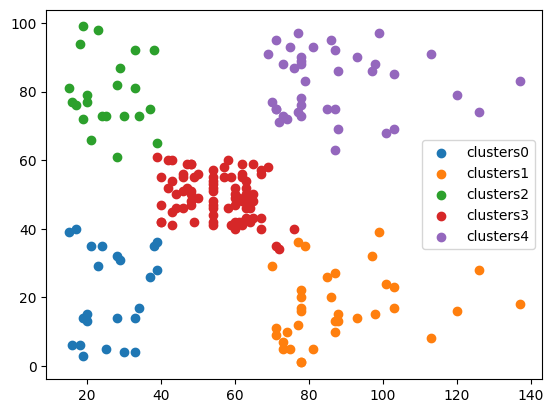

In [17]:
for i in range(5):
    plt.scatter(df.loc[df['clusters'] == i,'Annual Income (k$)'],
               df.loc[df['clusters'] == i, 'Spending Score (1-100)'],
               label = f'clusters{i}')
plt.legend()